In [47]:
import pandas as pd
import gc #garbage collector

pd.set_option('display.max_columns', None)
#pd.reset_option('display.max_rows')
pd.set_option('display.max_rows', 20)  # ao invés de none pode por INT do limite
#pd.set_option('display.max_colwidth', None)
def formatDate(date):
    dateStr = str(date)
    formatedDate = dateStr[0:4] + '-' + dateStr[4:6] + '-' +dateStr[6:8]
    return formatedDate

df = pd.read_csv('../../02 - Analise Exploratoria/data/OxCGRT_Brazil_latest.csv', low_memory=False)
df['FormattedDate'] = df['Date'].apply(formatDate)

## Separar colunas e linhas que serão utilizadas

In [48]:
pd.set_option('display.max_rows', 500)
df.dtypes

CountryName                               object
CountryCode                               object
RegionName                                object
RegionCode                                object
CityName                                  object
CityCode                                  object
Jurisdiction                              object
Date                                       int64
C1_School closing                        float64
C1_Flag                                  float64
C1_Notes                                  object
C2_Workplace closing                     float64
C2_Flag                                  float64
C2_Notes                                  object
C3_Cancel public events                  float64
C3_Flag                                  float64
C3_Notes                                  object
C4_Restrictions on gatherings            float64
C4_Flag                                  float64
C4_Notes                                  object
C5_Close public tran

In [49]:
df = df.drop(columns=['E1_Income support','E1_Flag', 'E1_Notes', 'E2_Debt/contract relief', 'E2_Notes','E3_Fiscal measures', 'E3_Notes', 'E4_International support', \
       'E4_Notes', 'H2_Testing policy', 'H2_Notes', 'H3_Contact tracing', 'H3_Notes', 'H4_Emergency investment in healthcare', 'H4_Notes', 'H5_Investment in vaccines', \
        'H5_Notes', 'H6_Facial Coverings', 'H6_Flag', 'H6_Notes', 'H7_Vaccination policy', 'H7_Flag', 'H7_Notes', 'H8_Protection of elderly people', 'H8_Flag', 'H8_Notes', \
        'M1_Wildcard', 'M1_Notes', 'V1_Vaccine Prioritisation', 'V1_Notes', 'V2_Vaccine Availability', 'V2_Notes', 'V3_Vaccine Financial Support', 'V3_Notes', \
         'V4_Mandatory Vaccination', 'V4_Notes', 'StringencyIndexForDisplay', 'StringencyLegacyIndex', 'StringencyLegacyIndexForDisplay', \
       'GovernmentResponseIndex', 'GovernmentResponseIndexForDisplay', 'ContainmentHealthIndex', 'ContainmentHealthIndexForDisplay', 'EconomicSupportIndex', \
         'EconomicSupportIndexForDisplay'])

In [50]:
df = df.drop(columns=['C1_Flag','C1_Notes', 'C2_Flag', 'C2_Notes', 'C3_Flag', 'C3_Notes', 'C4_Flag', 'C4_Notes', 'C5_Flag', 'C5_Notes', 'C6_Flag', 'C6_Notes', \
    'C7_Flag', 'C7_Notes', 'C8_Notes', 'H1_Flag', 'H1_Notes'])

In [51]:
df.dropna(axis=0, how='any', subset=['CityCode'], inplace=True)

In [52]:
#set index pro q quer organizar
df = df.set_index('CityName', 'FormattedDate')
df['NewDeaths'] = df['ConfirmedDeaths'] - df['ConfirmedDeaths'].shift(1)
df['NewCases'] = df['ConfirmedCases'] - df['ConfirmedCases'].shift(1)
df = df.reset_index()

C:\Users\edupo\AppData\Local\Temp\ipykernel_3672\2545608570.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.set_index except for the argument 'keys' will be keyword-only.
  df = df.set_index('CityName', 'FormattedDate')


In [53]:
#CITY_TOTAL: Descreve o ambiente de resposta geral que se aplica aos residentes do município, incluindo políticas definidas pelo governo nacional e pelo governo estadual,
#onde tais valores forem mais rigorosos do que a ação no nível municipal.
df = df.loc[df['Jurisdiction'] == 'CITY_TOTAL']

In [54]:
df

,CityName,CountryName,CountryCode,RegionName,RegionCode,CityCode,Jurisdiction,Date,C1_School closing,C2_Workplace closing,C3_Cancel public events,C4_Restrictions on gatherings,C5_Close public transport,C6_Stay at home requirements,C7_Restrictions on internal movement,C8_International travel controls,H1_Public information campaigns,ConfirmedCases,ConfirmedDeaths,StringencyIndex,FormattedDate,NewDeaths,NewCases
821,Cruzeiro do Sul,Brazil,BRA,Acre,BR_AC,BR_1200203,CITY_TOTAL,20200101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,2020-01-01,NaN,NaN
822,Cruzeiro do Sul,Brazil,BRA,Acre,BR_AC,BR_1200203,CITY_TOTAL,20200102,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,2020-01-02,NaN,NaN
823,Cruzeiro do Sul,Brazil,BRA,Acre,BR_AC,BR_1200203,CITY_TOTAL,20200103,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,2020-01-03,NaN,NaN
824,Cruzeiro do Sul,Brazil,BRA,Acre,BR_AC,BR_1200203,CITY_TOTAL,20200104,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,2020-01-04,NaN,NaN
825,Cruzeiro do Sul,Brazil,BRA,Acre,BR_AC,BR_1200203,CITY_TOTAL,20200105,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,2020-01-05,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132176,Palmas,Brazil,BRA,Tocantins,BR_TO,BR_1721000,CITY_TOTAL,20220327,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-03-27,NaN,NaN
132177,Palmas,Brazil,BRA,Tocantins,BR_TO,BR_1721000,CITY_TOTAL,20220328,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-03-28,NaN,NaN
132178,Palmas,Brazil,BRA,Tocantins,BR_TO,BR_1721000,CITY_TOTAL,20220329,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-03-29,NaN,NaN
132179,Palmas,Brazil,BRA,Tocantins,BR_TO,BR_1721000,CITY_TOTAL,20220330,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-03-30,NaN,NaN


## Integrar IDH's

In [55]:
df_idhm = pd.read_csv('../data/idhm2010-norm.csv', low_memory=False)
df_idhm

,name,state,idhm,idhmr,idhml,idhme
0,Sao Caetano do Sul,BR_SP,0.862,0.891,0.887,0.811
1,Aguas de Sao Pedro,BR_SP,0.854,0.849,0.890,0.825
2,Florianopolis,BR_SC,0.847,0.870,0.873,0.800
3,Balneario Camboriu,BR_SC,0.845,0.854,0.894,0.789
4,Vitoria,BR_ES,0.845,0.876,0.855,0.805
...,...,...,...,...,...,...
5559,Uiramuta,BR_RR,0.453,0.439,0.766,0.276
5560,Maraja do Sena,BR_MA,0.452,0.400,0.774,0.299
5561,Atalaia do Norte,BR_AM,0.450,0.481,0.733,0.259
5562,Fernando Falcao,BR_MA,0.443,0.417,0.728,0.286


In [56]:
df_new = df.merge(df_idhm, left_on=['CityName', 'RegionCode'], right_on=['name', 'state'])

In [57]:
df = df_new.drop(columns=['name', 'state'])

In [58]:
df

,CityName,CountryName,CountryCode,RegionName,RegionCode,CityCode,Jurisdiction,Date,C1_School closing,C2_Workplace closing,C3_Cancel public events,C4_Restrictions on gatherings,C5_Close public transport,C6_Stay at home requirements,C7_Restrictions on internal movement,C8_International travel controls,H1_Public information campaigns,ConfirmedCases,ConfirmedDeaths,StringencyIndex,FormattedDate,NewDeaths,NewCases,idhm,idhmr,idhml,idhme
0,Cruzeiro do Sul,Brazil,BRA,Acre,BR_AC,BR_1200203,CITY_TOTAL,20200101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,2020-01-01,NaN,NaN,0.664,0.648,0.776,0.582
1,Cruzeiro do Sul,Brazil,BRA,Acre,BR_AC,BR_1200203,CITY_TOTAL,20200102,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,2020-01-02,NaN,NaN,0.664,0.648,0.776,0.582
2,Cruzeiro do Sul,Brazil,BRA,Acre,BR_AC,BR_1200203,CITY_TOTAL,20200103,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,2020-01-03,NaN,NaN,0.664,0.648,0.776,0.582
3,Cruzeiro do Sul,Brazil,BRA,Acre,BR_AC,BR_1200203,CITY_TOTAL,20200104,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,2020-01-04,NaN,NaN,0.664,0.648,0.776,0.582
4,Cruzeiro do Sul,Brazil,BRA,Acre,BR_AC,BR_1200203,CITY_TOTAL,20200105,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,2020-01-05,NaN,NaN,0.664,0.648,0.776,0.582
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44329,Palmas,Brazil,BRA,Tocantins,BR_TO,BR_1721000,CITY_TOTAL,20220327,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-03-27,NaN,NaN,0.788,0.789,0.827,0.749
44330,Palmas,Brazil,BRA,Tocantins,BR_TO,BR_1721000,CITY_TOTAL,20220328,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-03-28,NaN,NaN,0.788,0.789,0.827,0.749
44331,Palmas,Brazil,BRA,Tocantins,BR_TO,BR_1721000,CITY_TOTAL,20220329,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-03-29,NaN,NaN,0.788,0.789,0.827,0.749
44332,Palmas,Brazil,BRA,Tocantins,BR_TO,BR_1721000,CITY_TOTAL,20220330,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-03-30,NaN,NaN,0.788,0.789,0.827,0.749


## Ponderar New Deaths

In [59]:
df_fx = pd.read_csv('../data/df_fx_etaria_mortes.csv', low_memory=False)

In [60]:
df_fx

,CodMun,CodEst,NomeDoEstado,NomeDoMunicipio,De 0 a 4 anos,ConfirmedCases,ConfirmedDeaths,TotalHabitantes,De 5 a 14 anos,De 15 a 24 anos,De 25 a 34 anos,De 35 a 44 anos,De 45 a 54 anos,De 55 a 64 anos,De 65 a 74 anos,De 75 anos ou mais,Weighted Rate De 0 a 4 anos,Weighted Rate De 5 a 14 anos,Weighted Rate De 15 a 24 anos,Weighted Rate De 25 a 34 anos,Weighted Rate De 35 a 44 anos,Weighted Rate De 45 a 54 anos,Weighted Rate De 55 a 64 anos,Weighted Rate De 65 a 74 anos,Weighted Rate De 75 anos ou mais,Weighted Death Rate per 100k,0 a 4 anos,5 a 14 anos,15 a 24 anos,25 a 34 anos,35 a 44 anos,45 a 54 anos,55 a 64 anos,65 a 74 anos,75 anos ou mais
0,BR_1100122,11,Rondônia,Ji-Paraná,9340,20399.0,610.0,130009,19290,21088,22439,20398,16343,11942,6129,3040,0.178295,0.145451,1.238683,5.217485,12.996793,31.318986,68.976840,107.910914,241.219531,469.202978,7.184118,14.837434,16.220416,17.259574,15.689683,12.570668,9.185518,4.714289,2.338300
1,BR_1100205,11,Rondônia,Porto Velho,40615,86593.0,2510.0,539354,82088,96761,100990,88911,62088,41886,18415,7600,0.176841,0.144265,1.228581,5.174931,12.890792,31.063550,68.414270,107.030800,239.252161,465.376191,7.530305,15.219689,17.940165,18.724252,16.484721,11.511549,7.765957,3.414270,1.409093
2,BR_1200203,12,Acre,Cruzeiro do Sul,8776,7903.0,168.0,89072,18320,18174,14530,12295,7667,4584,2779,1947,0.071672,0.058470,0.497934,2.097359,5.224537,12.589815,27.727771,43.378750,96.967038,188.613347,9.852703,20.567631,20.403718,16.312646,13.803440,8.607643,5.146398,3.119948,2.185872
3,BR_1200401,12,Acre,Rio Branco,31122,38206.0,1090.0,413418,72485,82213,70770,63302,43250,27205,14846,8225,0.100189,0.081733,0.696051,2.931851,7.303262,17.599016,38.760020,60.638168,135.548017,263.658307,7.527974,17.533102,19.886168,17.118268,15.311864,10.461567,6.580507,3.591039,1.989512
4,BR_1302603,13,Amazonas,Manaus,173066,206015.0,9504.0,2219580,378486,411118,383323,354773,246929,154338,78651,38896,0.162712,0.132739,1.130419,4.761463,11.860839,28.581624,62.948082,98.479215,220.136307,428.193399,7.797241,17.052145,18.522333,17.270069,15.983790,11.125033,6.953478,3.543508,1.752404
5,BR_1303403,13,Amazonas,Parintins,12387,10155.0,358.0,115363,24066,21542,19121,14458,10078,7098,4021,2592,0.117923,0.096201,0.819257,3.450812,8.595997,20.714180,45.620849,71.371601,159.541083,310.327904,10.737411,20.861108,18.673231,16.574638,12.532614,8.735903,6.152753,3.485520,2.246821
6,BR_1400100,14,Roraima,Boa Vista,34690,98074.0,1547.0,419652,67592,76375,84883,69443,42726,25860,12607,5476,0.140083,0.114278,0.973206,4.099263,10.211294,24.606638,54.193587,84.783232,189.520882,368.642463,8.266373,16.106679,18.199603,20.226998,16.547759,10.181293,6.162249,3.004156,1.304891
7,BR_1400472,14,Roraima,Rorainópolis,2706,3406.0,68.0,30782,4987,5704,6559,4863,2791,1838,979,355,0.083945,0.068482,0.583198,2.456501,6.119161,14.745631,32.475733,50.806705,113.571178,220.910532,8.790852,16.201027,18.530310,21.307907,15.798194,9.066987,5.971022,3.180430,1.153271
8,BR_1500800,15,Pará,Ananindeua,33506,29378.0,849.0,535547,79182,95610,92045,88533,66756,44541,24313,11061,0.060241,0.049144,0.418518,1.762848,4.391267,10.581844,23.305422,36.460201,81.501603,158.531089,6.256407,14.785257,17.852775,17.187100,16.531322,12.465012,8.316917,4.539844,2.065365
9,BR_1501402,15,Pará,Belém,82848,131343.0,5282.0,1499641,207038,242633,240977,250205,199298,142931,84593,49118,0.133843,0.109187,0.929855,3.916660,9.756428,23.510527,51.779514,81.006533,181.078606,352.221153,5.524522,13.805838,16.179406,16.068979,16.684326,13.289714,9.531014,5.640883,3.275317


In [61]:
df_fx.columns

Index(['CodMun', 'CodEst', 'NomeDoEstado', 'NomeDoMunicipio', 'De 0 a 4 anos',
       'ConfirmedCases', 'ConfirmedDeaths', 'TotalHabitantes',
       'De 5 a 14 anos', 'De 15 a 24 anos', 'De 25 a 34 anos',
       'De 35 a 44 anos', 'De 45 a 54 anos', 'De 55 a 64 anos',
       'De 65 a 74 anos', 'De 75 anos ou mais', 'Weighted Rate De 0 a 4 anos',
       'Weighted Rate De 5 a 14 anos', 'Weighted Rate De 15 a 24 anos',
       'Weighted Rate De 25 a 34 anos', 'Weighted Rate De 35 a 44 anos',
       'Weighted Rate De 45 a 54 anos', 'Weighted Rate De 55 a 64 anos',
       'Weighted Rate De 65 a 74 anos', 'Weighted Rate De 75 anos ou mais',
       'Weighted Death Rate per 100k', '0 a 4 anos', '5 a 14 anos',
       '15 a 24 anos', '25 a 34 anos', '35 a 44 anos', '45 a 54 anos',
       '55 a 64 anos', '65 a 74 anos', '75 anos ou mais'],
      dtype='object')

In [62]:
df_fx = df_fx[['CodMun', 'TotalHabitantes', 'De 0 a 4 anos', 'De 5 a 14 anos', 'De 15 a 24 anos', 'De 25 a 34 anos', 'De 35 a 44 anos', 'De 45 a 54 anos', 'De 55 a 64 anos', \
    'De 65 a 74 anos', 'De 75 anos ou mais', 'Weighted Rate De 0 a 4 anos', 'Weighted Rate De 5 a 14 anos', 'Weighted Rate De 15 a 24 anos', 'Weighted Rate De 25 a 34 anos', \
    'Weighted Rate De 35 a 44 anos', 'Weighted Rate De 45 a 54 anos', 'Weighted Rate De 55 a 64 anos', 'Weighted Rate De 65 a 74 anos', 'Weighted Rate De 75 anos ou mais']]

In [63]:
df_new = df.merge(df_fx, right_on=['CodMun'], left_on=['CityCode'])

In [64]:
df_new

,CityName,CountryName,CountryCode,RegionName,RegionCode,CityCode,Jurisdiction,Date,C1_School closing,C2_Workplace closing,C3_Cancel public events,C4_Restrictions on gatherings,C5_Close public transport,C6_Stay at home requirements,C7_Restrictions on internal movement,C8_International travel controls,H1_Public information campaigns,ConfirmedCases,ConfirmedDeaths,StringencyIndex,FormattedDate,NewDeaths,NewCases,idhm,idhmr,idhml,idhme,CodMun,TotalHabitantes,De 0 a 4 anos,De 5 a 14 anos,De 15 a 24 anos,De 25 a 34 anos,De 35 a 44 anos,De 45 a 54 anos,De 55 a 64 anos,De 65 a 74 anos,De 75 anos ou mais,Weighted Rate De 0 a 4 anos,Weighted Rate De 5 a 14 anos,Weighted Rate De 15 a 24 anos,Weighted Rate De 25 a 34 anos,Weighted Rate De 35 a 44 anos,Weighted Rate De 45 a 54 anos,Weighted Rate De 55 a 64 anos,Weighted Rate De 65 a 74 anos,Weighted Rate De 75 anos ou mais
0,Cruzeiro do Sul,Brazil,BRA,Acre,BR_AC,BR_1200203,CITY_TOTAL,20200101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,2020-01-01,NaN,NaN,0.664,0.648,0.776,0.582,BR_1200203,89072,8776,18320,18174,14530,12295,7667,4584,2779,1947,0.071672,0.058470,0.497934,2.097359,5.224537,12.589815,27.727771,43.378750,96.967038
1,Cruzeiro do Sul,Brazil,BRA,Acre,BR_AC,BR_1200203,CITY_TOTAL,20200102,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,2020-01-02,NaN,NaN,0.664,0.648,0.776,0.582,BR_1200203,89072,8776,18320,18174,14530,12295,7667,4584,2779,1947,0.071672,0.058470,0.497934,2.097359,5.224537,12.589815,27.727771,43.378750,96.967038
2,Cruzeiro do Sul,Brazil,BRA,Acre,BR_AC,BR_1200203,CITY_TOTAL,20200103,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,2020-01-03,NaN,NaN,0.664,0.648,0.776,0.582,BR_1200203,89072,8776,18320,18174,14530,12295,7667,4584,2779,1947,0.071672,0.058470,0.497934,2.097359,5.224537,12.589815,27.727771,43.378750,96.967038
3,Cruzeiro do Sul,Brazil,BRA,Acre,BR_AC,BR_1200203,CITY_TOTAL,20200104,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,2020-01-04,NaN,NaN,0.664,0.648,0.776,0.582,BR_1200203,89072,8776,18320,18174,14530,12295,7667,4584,2779,1947,0.071672,0.058470,0.497934,2.097359,5.224537,12.589815,27.727771,43.378750,96.967038
4,Cruzeiro do Sul,Brazil,BRA,Acre,BR_AC,BR_1200203,CITY_TOTAL,20200105,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,2020-01-05,NaN,NaN,0.664,0.648,0.776,0.582,BR_1200203,89072,8776,18320,18174,14530,12295,7667,4584,2779,1947,0.071672,0.058470,0.497934,2.097359,5.224537,12.589815,27.727771,43.378750,96.967038
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44329,Palmas,Brazil,BRA,Tocantins,BR_TO,BR_1721000,CITY_TOTAL,20220327,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-03-27,NaN,NaN,0.788,0.789,0.827,0.749,BR_1721000,306296,22750,51972,61858,56095,49490,31268,18570,9776,4517,0.084487,0.068924,0.586962,2.472354,6.158650,14.840791,32.685314,51.134585,114.304108
44330,Palmas,Brazil,BRA,Tocantins,BR_TO,BR_1721000,CITY_TOTAL,20220328,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-03-28,NaN,NaN,0.788,0.789,0.827,0.749,BR_1721000,306296,22750,51972,61858,56095,49490,31268,18570,9776,4517,0.084487,0.068924,0.586962,2.472354,6.158650,14.840791,32.685314,51.134585,114.304108
44331,Palmas,Brazil,BRA,Tocantins,BR_TO,BR_1721000,CITY_TOTAL,20220329,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-03-29,NaN,NaN,0.788,0.789,0.827,0.749,BR_1721000,306296,22750,51972,61858,56095,49490,31268,18570,9776,4517,0.084487,0.068924,0.586962,2.472354,6.158650,14.840791,32.685314,51.134585,114.304108
44332,Palmas,Brazil,BRA,Tocantins,BR_TO,BR_1721000,CITY_TOTAL,20220330,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-03-30,NaN,NaN,0.788,0.789,0.827,0.749,BR_1721000,306296,22750,51972,61858,56095,49490,31268,18570,9776,4517,0.084487,0.068924,0.586962,2.472354,6.158650,14.840791,32.685314,51.134585,114.304108


In [65]:
col_names = [
    ['De 0 a 4 anos', 0.00038],
    ['De 5 a 14 anos', 0.00031],
    ['De 15 a 24 anos', 0.00264],
    ['De 25 a 34 anos', 0.01112],
    ['De 35 a 44 anos', 0.02770],
    ['De 45 a 54 anos', 0.06675],
    ['De 55 a 64 anos', 0.14701],
    ['De 65 a 74 anos', 0.22999],
    ['De 75 anos ou mais', 0.51411]
]

In [66]:
import numpy as np

In [67]:
weighted_col = ['Weighted Rate De 0 a 4 anos', 'Weighted Rate De 5 a 14 anos', 'Weighted Rate De 15 a 24 anos', 'Weighted Rate De 25 a 34 anos', \
    'Weighted Rate De 35 a 44 anos', 'Weighted Rate De 45 a 54 anos', 'Weighted Rate De 55 a 64 anos', 'Weighted Rate De 65 a 74 anos', 'Weighted Rate De 75 anos ou mais']

In [68]:
for index, row in df_new.iterrows():


    for col, rate in col_names:
        df_new.loc[index, 'Weighted Rate ' + col] = row['NewDeaths'] * rate / row[col] * 100000 * row[col] / row['TotalHabitantes']

    df_new.loc[index, 'Morte ponderada por 100 mil'] = row[weighted_col].sum()

In [69]:
for index, row in df_new.iterrows():
    df_new.loc[index, 'Morte ponderada por 100 mil'] = row[weighted_col].sum()

In [70]:
df_new.columns

Index(['CityName', 'CountryName', 'CountryCode', 'RegionName', 'RegionCode',
       'CityCode', 'Jurisdiction', 'Date', 'C1_School closing',
       'C2_Workplace closing', 'C3_Cancel public events',
       'C4_Restrictions on gatherings', 'C5_Close public transport',
       'C6_Stay at home requirements', 'C7_Restrictions on internal movement',
       'C8_International travel controls', 'H1_Public information campaigns',
       'ConfirmedCases', 'ConfirmedDeaths', 'StringencyIndex', 'FormattedDate',
       'NewDeaths', 'NewCases', 'idhm', 'idhmr', 'idhml', 'idhme', 'CodMun',
       'TotalHabitantes', 'De 0 a 4 anos', 'De 5 a 14 anos', 'De 15 a 24 anos',
       'De 25 a 34 anos', 'De 35 a 44 anos', 'De 45 a 54 anos',
       'De 55 a 64 anos', 'De 65 a 74 anos', 'De 75 anos ou mais',
       'Weighted Rate De 0 a 4 anos', 'Weighted Rate De 5 a 14 anos',
       'Weighted Rate De 15 a 24 anos', 'Weighted Rate De 25 a 34 anos',
       'Weighted Rate De 35 a 44 anos', 'Weighted Rate De 45 a 5

In [71]:
df = df_new[['CityName', 'RegionName', 'RegionCode','FormattedDate',
       'CityCode', 'Date', 'C1_School closing',
       'C2_Workplace closing', 'C3_Cancel public events',
       'C4_Restrictions on gatherings', 'C5_Close public transport',
       'C6_Stay at home requirements', 'C7_Restrictions on internal movement',
       'C8_International travel controls', 'H1_Public information campaigns',
       'ConfirmedDeaths', 'StringencyIndex', 'NewDeaths', 'idhm', 'idhmr',
       'idhml', 'idhme', 'ConfirmedCases','NewCases','TotalHabitantes', 
       'Morte ponderada por 100 mil']]

In [72]:
df

,CityName,RegionName,RegionCode,FormattedDate,CityCode,Date,C1_School closing,C2_Workplace closing,C3_Cancel public events,C4_Restrictions on gatherings,C5_Close public transport,C6_Stay at home requirements,C7_Restrictions on internal movement,C8_International travel controls,H1_Public information campaigns,ConfirmedDeaths,StringencyIndex,NewDeaths,idhm,idhmr,idhml,idhme,ConfirmedCases,NewCases,TotalHabitantes,Morte ponderada por 100 mil
0,Cruzeiro do Sul,Acre,BR_AC,2020-01-01,BR_1200203,20200101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.664,0.648,0.776,0.582,NaN,NaN,89072,0.0
1,Cruzeiro do Sul,Acre,BR_AC,2020-01-02,BR_1200203,20200102,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.664,0.648,0.776,0.582,NaN,NaN,89072,0.0
2,Cruzeiro do Sul,Acre,BR_AC,2020-01-03,BR_1200203,20200103,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.664,0.648,0.776,0.582,NaN,NaN,89072,0.0
3,Cruzeiro do Sul,Acre,BR_AC,2020-01-04,BR_1200203,20200104,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.664,0.648,0.776,0.582,NaN,NaN,89072,0.0
4,Cruzeiro do Sul,Acre,BR_AC,2020-01-05,BR_1200203,20200105,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.664,0.648,0.776,0.582,NaN,NaN,89072,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44329,Palmas,Tocantins,BR_TO,2022-03-27,BR_1721000,20220327,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.788,0.789,0.827,0.749,NaN,NaN,306296,0.0
44330,Palmas,Tocantins,BR_TO,2022-03-28,BR_1721000,20220328,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.788,0.789,0.827,0.749,NaN,NaN,306296,0.0
44331,Palmas,Tocantins,BR_TO,2022-03-29,BR_1721000,20220329,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.788,0.789,0.827,0.749,NaN,NaN,306296,0.0
44332,Palmas,Tocantins,BR_TO,2022-03-30,BR_1721000,20220330,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.788,0.789,0.827,0.749,NaN,NaN,306296,0.0


## Adicionar Media Movel

In [73]:
dfReindexed = df.set_index(['CityName','RegionCode','FormattedDate'])


In [74]:
dfReindexed['MortePonderadaP100kMA'] = dfReindexed['Morte ponderada por 100 mil'].rolling(14, center=True).mean()

## Implementar o lag nas mortes

In [75]:
vals = {5,10,15,20,25,30,35,37,40,45,50,55,60,90,120}
for val in vals:
    dfReindexed['NewDeathsLag+' + str(val)] = dfReindexed['NewDeaths'].shift(-val)
    dfReindexed['ConfirmedDeathsLag+' + str(val)] = dfReindexed['ConfirmedDeaths'].shift(-val)
    dfReindexed['MortePonderadaP100kLag+' + str(val)] = dfReindexed['Morte ponderada por 100 mil'].shift(-val)
    dfReindexed['MortePonderadaP100kMALag+' + str(val)] = dfReindexed['MortePonderadaP100kMA'].shift(-val)


<AxesSubplot:xlabel='FormattedDate'>

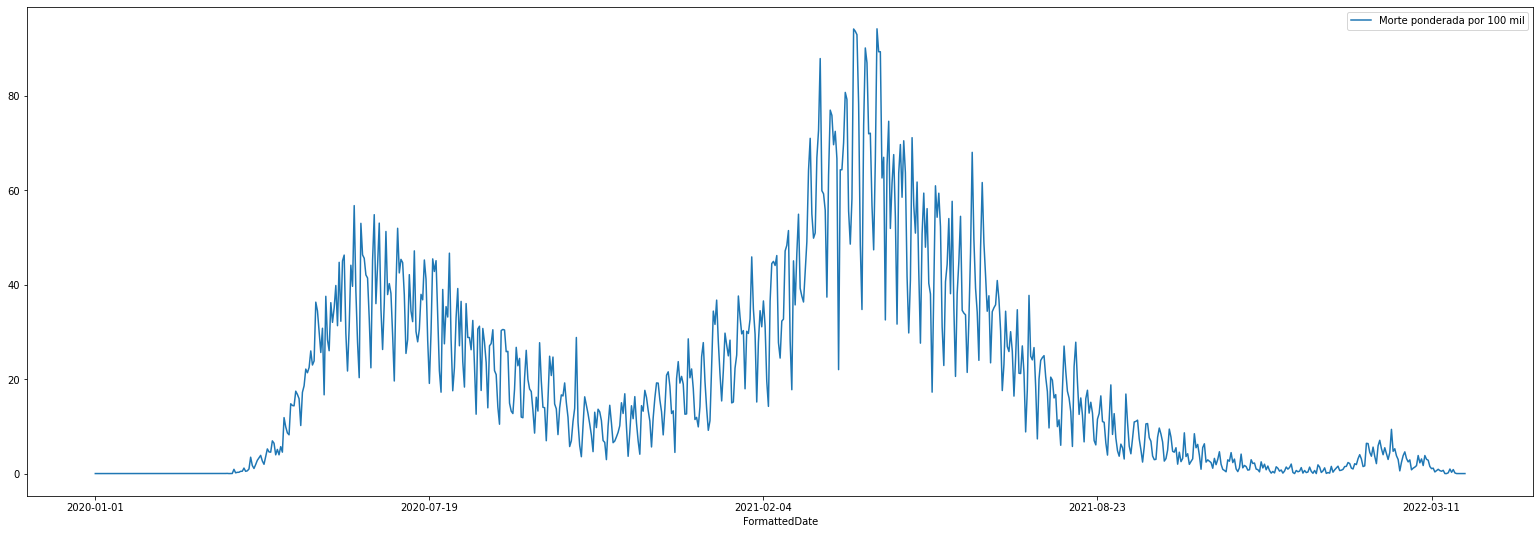

In [76]:
dfReindexed = dfReindexed.reset_index()

dfReindexed.groupby('FormattedDate').sum().plot(y='Morte ponderada por 100 mil',  figsize=(27,9))

<AxesSubplot:xlabel='FormattedDate'>

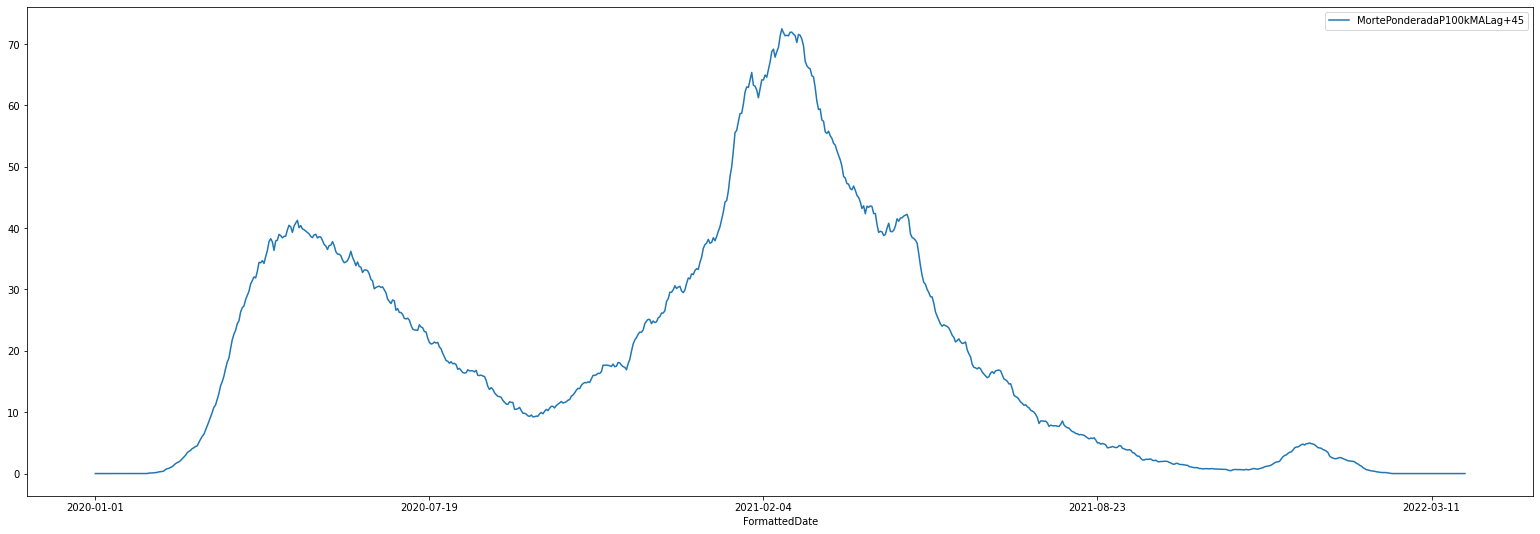

In [77]:
#dfReindexed.groupby('FormattedDate').sum().plot(y=np.log(dfReindexed['MortePonderadaP100kMALag+45']),  figsize=(27,9))
dfReindexed.groupby('FormattedDate').sum().plot(y='MortePonderadaP100kMALag+45',  figsize=(27,9))

# Ponderar novas infecções pelo total de habitantes

In [78]:
#set index pro q quer organizar
dfReindexed = dfReindexed.set_index('CityName', 'FormattedDate')
dfReindexed['NewCases'] = dfReindexed['ConfirmedCases'] - dfReindexed['ConfirmedCases'].shift(1)
dfReindexed = dfReindexed.reset_index()

C:\Users\edupo\AppData\Local\Temp\ipykernel_3672\1654764007.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.set_index except for the argument 'keys' will be keyword-only.
  dfReindexed = dfReindexed.set_index('CityName', 'FormattedDate')


In [79]:
dfReindexed.loc[ dfReindexed['NewCases'] < 0, 'NewCases'] = 0

In [80]:
dfReindexed['NewCasesPonderado'] = dfReindexed['NewCases'] / dfReindexed['TotalHabitantes'] * 100000


## Selecionar dados referentes a primeira onda

In [81]:
dfReindexed

,CityName,RegionCode,FormattedDate,RegionName,CityCode,Date,C1_School closing,C2_Workplace closing,C3_Cancel public events,C4_Restrictions on gatherings,C5_Close public transport,C6_Stay at home requirements,C7_Restrictions on internal movement,C8_International travel controls,H1_Public information campaigns,ConfirmedDeaths,StringencyIndex,NewDeaths,idhm,idhmr,idhml,idhme,ConfirmedCases,NewCases,TotalHabitantes,Morte ponderada por 100 mil,MortePonderadaP100kMA,NewDeathsLag+35,ConfirmedDeathsLag+35,MortePonderadaP100kLag+35,MortePonderadaP100kMALag+35,NewDeathsLag+37,ConfirmedDeathsLag+37,MortePonderadaP100kLag+37,MortePonderadaP100kMALag+37,NewDeathsLag+5,ConfirmedDeathsLag+5,MortePonderadaP100kLag+5,MortePonderadaP100kMALag+5,NewDeathsLag+40,ConfirmedDeathsLag+40,MortePonderadaP100kLag+40,MortePonderadaP100kMALag+40,NewDeathsLag+10,ConfirmedDeathsLag+10,MortePonderadaP100kLag+10,MortePonderadaP100kMALag+10,NewDeathsLag+45,ConfirmedDeathsLag+45,MortePonderadaP100kLag+45,MortePonderadaP100kMALag+45,NewDeathsLag+15,ConfirmedDeathsLag+15,MortePonderadaP100kLag+15,MortePonderadaP100kMALag+15,NewDeathsLag+50,ConfirmedDeathsLag+50,MortePonderadaP100kLag+50,MortePonderadaP100kMALag+50,NewDeathsLag+20,ConfirmedDeathsLag+20,MortePonderadaP100kLag+20,MortePonderadaP100kMALag+20,NewDeathsLag+55,ConfirmedDeathsLag+55,MortePonderadaP100kLag+55,MortePonderadaP100kMALag+55,NewDeathsLag+120,ConfirmedDeathsLag+120,MortePonderadaP100kLag+120,MortePonderadaP100kMALag+120,NewDeathsLag+25,ConfirmedDeathsLag+25,MortePonderadaP100kLag+25,MortePonderadaP100kMALag+25,NewDeathsLag+90,ConfirmedDeathsLag+90,MortePonderadaP100kLag+90,MortePonderadaP100kMALag+90,NewDeathsLag+60,ConfirmedDeathsLag+60,MortePonderadaP100kLag+60,MortePonderadaP100kMALag+60,NewDeathsLag+30,ConfirmedDeathsLag+30,MortePonderadaP100kLag+30,MortePonderadaP100kMALag+30,NewCasesPonderado
0,Cruzeiro do Sul,BR_AC,2020-01-01,Acre,BR_1200203,20200101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.664,0.648,0.776,0.582,NaN,NaN,89072,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN
1,Cruzeiro do Sul,BR_AC,2020-01-02,Acre,BR_1200203,20200102,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.664,0.648,0.776,0.582,NaN,NaN,89072,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN
2,Cruzeiro do Sul,BR_AC,2020-01-03,Acre,BR_1200203,20200103,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.664,0.648,0.776,0.582,NaN,NaN,89072,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN
3,Cruzeiro do Sul,BR_AC,2020-01-04,Acre,BR_1200203,20200104,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.664,0.648,0.776,0.582,NaN,NaN,89072,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN
4,Cruzeiro do Sul,BR_AC,2020-01-05,Acre,BR_1200203,20200105,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.664,0.648,0.776,0.582,NaN,NaN,89072,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [82]:
#Separar apenas as entradas que foram durante a primeira onda
df = dfReindexed.loc[(dfReindexed['FormattedDate'] >= '2020-03-02') & (dfReindexed['FormattedDate'] <= '2020-11-02')]

In [83]:
#dfReindexed.to_csv('../data/df_dados_integrados.csv', index=False)
df.to_csv('../data/df_dados_integrados.csv', index=False)

In [84]:
#Converte coluna Date de INT para DATETIME
df['Date'] = pd.to_datetime(df['Date'], format='%Y%m%d')

C:\Users\edupo\AppData\Local\Temp\ipykernel_3672\2993451377.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'], format='%Y%m%d')


In [85]:
#organizar por data/cidade
df_sorted = df.sort_values(by=['Date', 'CityName'])
df_sorted

,CityName,RegionCode,FormattedDate,RegionName,CityCode,Date,C1_School closing,C2_Workplace closing,C3_Cancel public events,C4_Restrictions on gatherings,C5_Close public transport,C6_Stay at home requirements,C7_Restrictions on internal movement,C8_International travel controls,H1_Public information campaigns,ConfirmedDeaths,StringencyIndex,NewDeaths,idhm,idhmr,idhml,idhme,ConfirmedCases,NewCases,TotalHabitantes,Morte ponderada por 100 mil,MortePonderadaP100kMA,NewDeathsLag+35,ConfirmedDeathsLag+35,MortePonderadaP100kLag+35,MortePonderadaP100kMALag+35,NewDeathsLag+37,ConfirmedDeathsLag+37,MortePonderadaP100kLag+37,MortePonderadaP100kMALag+37,NewDeathsLag+5,ConfirmedDeathsLag+5,MortePonderadaP100kLag+5,MortePonderadaP100kMALag+5,NewDeathsLag+40,ConfirmedDeathsLag+40,MortePonderadaP100kLag+40,MortePonderadaP100kMALag+40,NewDeathsLag+10,ConfirmedDeathsLag+10,MortePonderadaP100kLag+10,MortePonderadaP100kMALag+10,NewDeathsLag+45,ConfirmedDeathsLag+45,MortePonderadaP100kLag+45,MortePonderadaP100kMALag+45,NewDeathsLag+15,ConfirmedDeathsLag+15,MortePonderadaP100kLag+15,MortePonderadaP100kMALag+15,NewDeathsLag+50,ConfirmedDeathsLag+50,MortePonderadaP100kLag+50,MortePonderadaP100kMALag+50,NewDeathsLag+20,ConfirmedDeathsLag+20,MortePonderadaP100kLag+20,MortePonderadaP100kMALag+20,NewDeathsLag+55,ConfirmedDeathsLag+55,MortePonderadaP100kLag+55,MortePonderadaP100kMALag+55,NewDeathsLag+120,ConfirmedDeathsLag+120,MortePonderadaP100kLag+120,MortePonderadaP100kMALag+120,NewDeathsLag+25,ConfirmedDeathsLag+25,MortePonderadaP100kLag+25,MortePonderadaP100kMALag+25,NewDeathsLag+90,ConfirmedDeathsLag+90,MortePonderadaP100kLag+90,MortePonderadaP100kMALag+90,NewDeathsLag+60,ConfirmedDeathsLag+60,MortePonderadaP100kLag+60,MortePonderadaP100kMALag+60,NewDeathsLag+30,ConfirmedDeathsLag+30,MortePonderadaP100kLag+30,MortePonderadaP100kMALag+30,NewCasesPonderado
20586,Ananindeua,BR_PA,2020-03-02,Para,BR_1500800,2020-03-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,NaN,11.11,NaN,0.718,0.684,0.821,0.658,NaN,NaN,535547,0.000000,1.268826e-16,0.0,0.0,0.000000,1.268826e-16,0.0,0.0,0.000000,1.268826e-16,NaN,NaN,0.000000,1.268826e-16,0.0,0.0,0.000000,1.333763e-02,NaN,NaN,0.000000,1.268826e-16,0.0,0.0,0.000000,1.333763e-02,NaN,NaN,0.000000,1.268826e-16,0.0,1.0,0.000000,1.067011e-01,NaN,NaN,0.000000,1.268826e-16,0.0,8.0,0.000000,2.000645e-01,1.0,331.0,0.186727,0.240077,0.0,0.0,0.000000,1.268826e-16,0.0,240.0,0.000000,1.227062,1.0,12.0,0.186727,4.401418e-01,0.0,0.0,0.000000,1.268826e-16,NaN
12376,Aparecida de Goiania,BR_GO,2020-03-02,Goias,BR_5201405,2020-03-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,NaN,11.11,NaN,0.718,0.716,0.834,0.620,NaN,NaN,590146,0.000000,1.268826e-16,0.0,0.0,0.000000,1.210366e-02,0.0,0.0,0.000000,1.210366e-02,NaN,NaN,0.000000,1.268826e-16,0.0,0.0,0.000000,1.210366e-02,NaN,NaN,0.000000,1.268826e-16,0.0,1.0,0.000000,1.210366e-02,NaN,NaN,0.000000,1.268826e-16,0.0,1.0,0.000000,1.210366e-02,NaN,0.0,0.000000,1.268826e-16,0.0,2.0,0.000000,1.210366e-02,4.0,53.0,0.677805,0.351006,0.0,0.0,0.000000,1.268826e-16,0.0,10.0,0.000000,0.060518,0.0,2.0,0.000000,1.210366e-02,0.0,0.0,0.000000,1.268826e-16,NaN
39469,Aracaju,BR_SE,2020-03-02,Sergipe,BR_2800308,2020-03-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,NaN,11.11,NaN,0.770,0.784,0.823,0.708,NaN,NaN,664908,0.000000,2.537653e-16,NaN,4.0,0.000000,3.222820e-02,0.0,4.0,0.000000,3.222820e-02,NaN,NaN,0.000000,2.537653e-16,0.0,4.0,0.000000,1.074273e-02,NaN,NaN,0.000000,2.537653e-16,0.0,4.0,0.000000,1.074273e-02,NaN,NaN,0.000000,2.537653e-16,1.0,5.0,0.150398,3.222820e-02,NaN,NaN,0.000000,2.537653e-16,0.0,6.0,0.000000,3.222820e-02,14.0,286.0,2.105576,1.557696,NaN,0.0,0.000000,2.148546e-02,3.0,71.0,0.451195,0.569365,0.0,7.0,0.000000,5.371366e-02,0.0,0.0,0.000000,3.222820e-02,NaN
42753,Araguaina,BR_TO,2020-03-02,Tocantins,BR_1702109,2020-03-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,NaN,11.11,NaN,0.752,0.727,0.821,0.712,NaN,NaN,183381,0.000000,2.537653e-16,0.0,0.0,0.000000,2.537653e-16,0.0,0.0,0.000000,2.537653e-16,NaN,NaN,0.000000,2.537653

# Dataset pronto!